In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from seaborn import set_style
import kagglehub
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
set_style("whitegrid")

In [2]:
dst_stocks = pd.read_csv('DST_Finance_Stocks.csv')
weekend_stocks = pd.read_csv('Weekends_Finance_Stocks.csv')

In [7]:
dst_stocks['return'] = (dst_stocks['mon_open']-dst_stocks['fri_close'])/dst_stocks['fri_close']
weekend_stocks['return'] = (weekend_stocks['mon_open']-weekend_stocks['fri_close'])/weekend_stocks['fri_close']
dst_stocks['mon_range'] = (dst_stocks['mon_high']-dst_stocks['mon_low'])/dst_stocks['mon_low']
dst_stocks['fri_range'] = (dst_stocks['fri_high']-dst_stocks['fri_low'])/dst_stocks['fri_low']
weekend_stocks['mon_range'] = (weekend_stocks['mon_high']-weekend_stocks['mon_low'])/weekend_stocks['mon_low']
weekend_stocks['fri_range'] = (weekend_stocks['fri_high']-weekend_stocks['fri_low'])/weekend_stocks['fri_low']

dst_stocks['y'] = 1
weekend_stocks['y'] = 0

In [ ]:
#multivariable_fit_input = pd.DataFrame()
#multivariable_fit_input['y'] = pd.concat([dst_stocks['y'],weekend_stocks['y']])
#multivariable_fit_input['return'] = pd.concat([dst_stocks['return'],weekend_stocks['return']])
#multivariable_fit_input['mon_volume'] = pd.concat([dst_stocks['mon_volume'],weekend_stocks['mon_volume']])
#multivariable_fit_input['fri_volume'] = pd.concat([dst_stocks['fri_volume'],weekend_stocks['fri_volume']])
#multivariable_fit_input['mon_range'] = pd.concat([dst_stocks['mon_range'],weekend_stocks['mon_range']])
#multivariable_fit_input['fri_range'] = pd.concat([dst_stocks['fri_range'],weekend_stocks['fri_range']])
#multivariable_fit_input = multivariable_fit_input.sample(frac=1).reset_index()

#split80 = int(multivariable_fit_input.shape[0]*0.8)-1
#multivariable_fit_train = multivariable_fit_input[:split80]
#multivariable_fit_test = multivariable_fit_input[split80:]

In [8]:
dst_stocks = dst_stocks.sample(frac=1).reset_index()
dst_stocks_fall = dst_stocks[dst_stocks['Season']=='Fall']
dst_stocks_spring = dst_stocks[dst_stocks['Season']=='Spring']
weekend_stocks = weekend_stocks.sample(frac=1).reset_index()

split80_dst = int(dst_stocks.shape[0]*0.8)-1
split80_dst_fall = int(dst_stocks_fall.shape[0]*0.8)-1
split80_dst_spring = int(dst_stocks_spring.shape[0]*0.8)-1
split80_wkd = int(weekend_stocks.shape[0]*0.8)-1

dst_train = dst_stocks[:split80_dst]
dst_test = dst_stocks[split80_dst:]
dst_fall_train = dst_stocks_fall[:split80_dst_fall]
dst_fall_test = dst_stocks_fall[split80_dst_fall:]
dst_spring_train = dst_stocks_spring[:split80_dst_spring]
dst_spring_test = dst_stocks_spring[split80_dst_spring:]
weekend_train = weekend_stocks[:split80_wkd]
weekend_test = weekend_stocks[split80_wkd:]

In [9]:
multivariable_fit_train = pd.DataFrame()
multivariable_fit_train['y'] = pd.concat([dst_train['y'],weekend_train['y']])
multivariable_fit_train['return'] = pd.concat([dst_train['return'],weekend_train['return']])
multivariable_fit_train['mon_volume'] = pd.concat([dst_train['mon_volume'],weekend_train['mon_volume']])
multivariable_fit_train['fri_volume'] = pd.concat([dst_train['fri_volume'],weekend_train['fri_volume']])
multivariable_fit_train['mon_range'] = pd.concat([dst_train['mon_range'],weekend_train['mon_range']])
multivariable_fit_train['fri_range'] = pd.concat([dst_train['fri_range'],weekend_train['fri_range']])
multivariable_fit_train = multivariable_fit_train.sample(frac=1).reset_index()

In [32]:
X = np.concatenate([multivariable_fit_train[['return']].values,multivariable_fit_train[['mon_volume']].values,multivariable_fit_train[['fri_volume']].values,multivariable_fit_train[['mon_range']].values, multivariable_fit_train[['fri_range']].values],axis=-1)
y = multivariable_fit_train['y'].values
X.shape

(431339, 5)

In [11]:
multivariable_fit_test = pd.DataFrame()
multivariable_fit_test['y'] = pd.concat([dst_test['y'],weekend_test['y']])
multivariable_fit_test['return'] = pd.concat([dst_test['return'],weekend_test['return']])
multivariable_fit_test['mon_volume'] = pd.concat([dst_test['mon_volume'],weekend_test['mon_volume']])
multivariable_fit_test['fri_volume'] = pd.concat([dst_test['fri_volume'],weekend_test['fri_volume']])
multivariable_fit_test['mon_range'] = pd.concat([dst_test['mon_range'],weekend_test['mon_range']])
multivariable_fit_test['fri_range'] = pd.concat([dst_test['fri_range'],weekend_test['fri_range']])
multivariable_fit_test = multivariable_fit_test.sample(frac=1).reset_index()

In [36]:
X_test = np.concatenate([multivariable_fit_test[['return']].values,multivariable_fit_test[['mon_volume']].values,multivariable_fit_test[['fri_volume']].values,multivariable_fit_test[['mon_range']].values, multivariable_fit_test[['fri_range']].values],axis=-1)
y_test = multivariable_fit_test['y'].values
X_test.shape

(107838, 5)

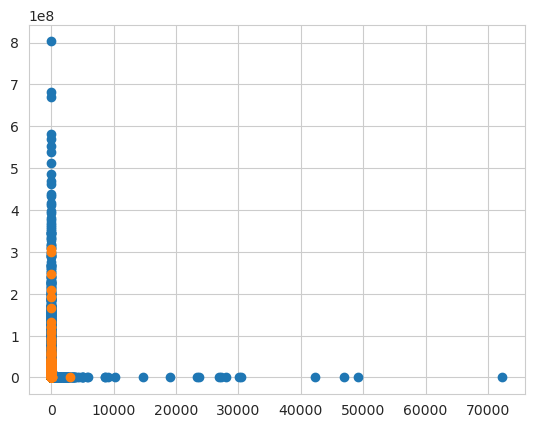

In [10]:
plt.clf()
plt.scatter(weekend_stocks['return'],weekend_stocks['mon_volume'])
plt.scatter(dst_stocks['return'],dst_stocks['mon_volume'])
plt.show()

In [60]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
                                n_estimators=100,
                                algorithm = 'SAMME.R',
                                learning_rate = 0.5,
                                random_state=123)
ada_clf.fit(X,y)

/home/hava/Apps/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    max_depth=5),
                   learning_rate=0.5, n_estimators=100, random_state=123)

In [61]:
prob_test_dst = ada_clf.predict_proba(np.concatenate([dst_test[['return']].values,dst_test[['mon_volume']].values,dst_test[['fri_volume']].values,dst_test[['mon_range']].values, dst_test[['fri_range']].values],axis=-1))
prob_test_wkd = ada_clf.predict_proba(np.concatenate([weekend_test[['return']].values,weekend_test[['mon_volume']].values,weekend_test[['fri_volume']].values,weekend_test[['mon_range']].values, weekend_test[['fri_range']].values],axis=-1))
pred_test_dst = ada_clf.predict(np.concatenate([dst_test[['return']].values,dst_test[['mon_volume']].values,dst_test[['fri_volume']].values,dst_test[['mon_range']].values, dst_test[['fri_range']].values],axis=-1))
pred_test_wkd = ada_clf.predict(np.concatenate([weekend_test[['return']].values,weekend_test[['mon_volume']].values,weekend_test[['fri_volume']].values,weekend_test[['mon_range']].values, weekend_test[['fri_range']].values],axis=-1))

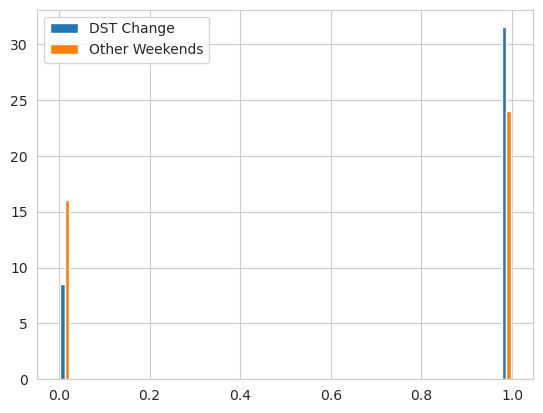

In [62]:
plt.clf()

#plt.hist([prob_test_dst[:,1],prob_test_wkd[:,1]], range=[0.0,1.0], bins=40, density=True, label=['DST Change','Other Weekends'])
plt.hist([pred_test_dst,pred_test_wkd], range=[0.0,1.0], bins=40, density=True, label=['DST Change','Other Weekends'])
plt.legend()

plt.show()

In [63]:
print('DST Accuracy: ', pred_test_dst.sum()/len(pred_test_dst)*100.,'%')
print('Non-DST Accuracy: ', (len(pred_test_wkd) - pred_test_wkd.sum())/len(pred_test_wkd)*100.,'%')

DST Accuracy:  78.7420556651326 %
Non-DST Accuracy:  40.04163640764948 %


In [ ]:
fall_fit_train = pd.DataFrame()
fall_fit_train['y'] = pd.concat([dst_fall_train['y'],weekend_train['y']])
fall_fit_train['return'] = pd.concat([dst_fall_train['return'],weekend_train['return']])
fall_fit_train['mon_volume'] = pd.concat([dst_fall_train['mon_volume'],weekend_train['mon_volume']])
fall_fit_train['fri_volume'] = pd.concat([dst_fall_train['fri_volume'],weekend_train['fri_volume']])
fall_fit_train['mon_range'] = pd.concat([dst_fall_train['mon_range'],weekend_train['mon_range']])
fall_fit_train['fri_range'] = pd.concat([dst_fall_train['fri_range'],weekend_train['fri_range']])
fall_fit_train = fall_fit_train.sample(frac=1).reset_index()

In [ ]:
X_fall = np.concatenate([fall_fit_train[['return']].values,fall_fit_train[['mon_volume']].values,fall_fit_train[['fri_volume']].values,fall_fit_train[['mon_range']].values, fall_fit_train[['fri_range']].values],axis=-1)
y_fall = fall_fit_train['y'].values